# Exploring the use of Animal Faces dataset

## Importing basic packages
- numpy: computiong library for large/multidimensioanl array and functions
- pandas: data analysis and data manipulation

In [1]:
import numpy as np
import pandas as pd

For AI modeling there are two main libraries:
- Tensoflow - Google brain
- Pytorch - Meta AI

In [2]:
import tensorflow as tf 
import torch as pt

2024-03-21 00:47:11.754431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-21 00:47:11.754561: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-21 00:47:11.902028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Checking tensorflow & torch versions

In [3]:
print("Tensorflow version: " + tf.__version__)
print("PyTorch version: " + pt.__version__)

Tensorflow version: 2.15.0
PyTorch version: 2.1.2


# Importing a dataset from Kaggle

In [4]:
import os
from PIL import Image

In [5]:
src_dirs = ['/kaggle/input/animal-faces/afhq/train/cat', '/kaggle/input/animal-faces/afhq/train/dog', '/kaggle/input/animal-faces/afhq/val/cat', '/kaggle/input/animal-faces/afhq/val/dog']
dst_dir = '/kaggle/working/'

In [6]:
os.makedirs(dst_dir, exist_ok=True)

In [7]:
import os
dir_path = '/kaggle/working/' #define directory
items = os.listdir(dir_path) #list all items in the directory
for item in items: #print all folders
    if os.path.isdir(os.path.join(dir_path, item)):
        print(item)

In [8]:
import os
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In every train dataset cat & dog we have 821 pictures that are called flickr_cat or flickr_dog and 4834 pixabay_cat or pixabay_dog. Overall in the dataset I have around 5655 images for cat & around 5655 images for dog.

This images are at 512×512 resolution. 

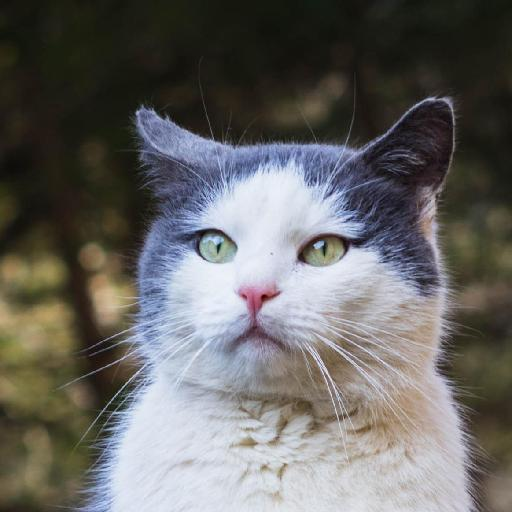

In [9]:
load_img('/kaggle/input/animal-faces/afhq/train/cat/pixabay_cat_004834.jpg')

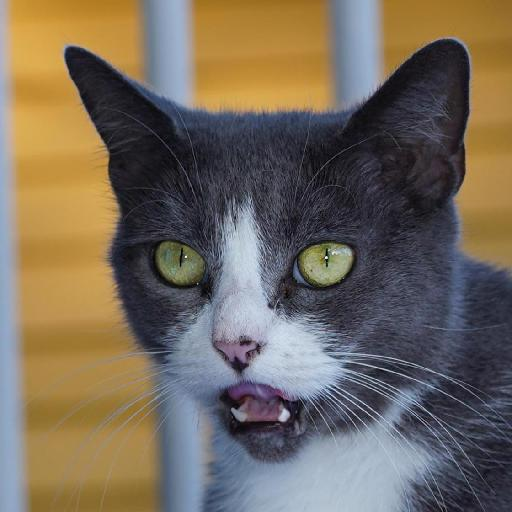

In [10]:
load_img('/kaggle/input/animal-faces/afhq/train/cat/flickr_cat_000003.jpg')

# Train the data

In [11]:
train_dir = '/kaggle/input/animal-faces/afhq/train' #train set
test_dir = '/kaggle/input/animal-faces/afhq/val' #test set

In [12]:
if os.path.isdir(train_dir) and os.path.isdir(test_dir): #cheking if the directories for training & dataset exist
    train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True) #rescaling the image by 1/255 ...

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
training_set = train_datagen.flow_from_directory(train_dir,target_size=(64, 64),batch_size=32,class_mode='binary') #loading the images from the training directory

Found 14630 images belonging to 3 classes.


In [15]:
test_set = test_datagen.flow_from_directory(test_dir,target_size=(64, 64),batch_size=32,class_mode='binary') #loading the images from the set directory

Found 1500 images belonging to 3 classes.


Print number of samples in the validation set    

In [16]:
print(f'Number of samples in the validation set: {len(test_set)}') #printing the numbers of samples in the validation set

Number of samples in the validation set: 47


# Building the Convolutional Neural Networks (CNNs) model

In [17]:
model = models.Sequential() #creating sequential model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))) #adding first convolutional layer ewith 32 layers, kernel size 3x3 & activation function & input shape of 64x64x3
model.add(layers.MaxPooling2D((2, 2))) #pool size of 2x2 to reduce spatial dimensions
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 layers & kernels size 3x3
model.add(layers.MaxPooling2D((2, 2))) #pool size of 2x2 to reduce spatial dimensions
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #64 layers & kernels size 3x3

Adding layers on top

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) #actiavtion='relu' -> function returns x if x is greater than 0, and returns 0 otherwise
#dense layer or connected layer is type of layer in neural network where each neuron is connected to every neuron in the preceding layer
model.add(layers.Dense(1))

In [19]:
model.compile(optimizer='adam', #the 'adam' part is opotimizer for the training process
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])

Training the model

In [20]:
history = model.fit(
    training_set, #dataset used for training model
    epochs=10, #number of iterations over the dataset
    validation_data=test_set) #validation the performance of the trained model

Epoch 1/10


I0000 00:00:1710982074.792246      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


458/458 [==============================] - 188s 402ms/step - loss: -975415.0000 - accuracy: 0.3336 - val_loss: -10212478.0000 - val_accuracy: 0.3460
Epoch 2/10
458/458 [==============================] - 64s 139ms/step - loss: -161635424.0000 - accuracy: 0.3361 - val_loss: -662587200.0000 - val_accuracy: 0.3533
Epoch 3/10
458/458 [==============================] - 61s 132ms/step - loss: -2118389248.0000 - accuracy: 0.3368 - val_loss: -5913153536.0000 - val_accuracy: 0.3493
Epoch 4/10
458/458 [==============================] - 58s 128ms/step - loss: -11000318976.0000 - accuracy: 0.3362 - val_loss: -23854368768.0000 - val_accuracy: 0.3493
Epoch 5/10
458/458 [==============================] - 59s 128ms/step - loss: -34700668928.0000 - accuracy: 0.3357 - val_loss: -67822473216.0000 - val_accuracy: 0.3500
Epoch 6/10
458/458 [==============================] - 60s 131ms/step - loss: -85014282240.0000 - accuracy: 0.3364 - val_loss: -150452617216.0000 - val_accuracy: 0.3487
Epoch 7/10
458/458 [=